# Pandas II - working with data

Last time, we met some of the basic data structures in pandas.

Basic pandas objects:

* Index
* Series
* Data Frame

We also learned how these three things are related. Namely, we can think of a pandas `DataFrame` as being composed of several *named columns*, each of which is like a `Series`, and a special `Index` column along the left-hand side.

Let's build a little data frame and take look at it to remind ourselves of this structure. We'll build one similar to a data frame we played with last time.

It will have 5 columns co

First, import `pandas` because of course, and `numpy` in order to simulate some data.

In [1]:
import pandas as pd    
import numpy as np     # to make some simulated data

Now we can make the data frame. It will have 4 variables of cardiovascular data for a number of patients that we can specify. Because a pandas `DataFrame` has that special index column, we'll just use it to correspond to "patient ID" instead of making a fifth variable.

In [2]:
num_patients = 10    # specify the number of patients

# make some simulated data 
sys_bp = np.int64(125 + 5*np.random.randn(num_patients,))
dia_bp = np.int64(80 + 5*np.random.randn(num_patients,))
b_oxy = np.round(98.5 + 0.3*np.random.randn(num_patients,), 2)
pulse = np.int64(65 + 2*np.random.randn(num_patients,))

# Make a dictionary with a "key" for each variable name, and 
# the "values" being the num_patients long data vectors
df_dict = {'systolic BP' : sys_bp,
           'diastolic BP' : dia_bp,
           'blood oxygenation' : b_oxy,
           'pulse rate' : pulse
           }
    
our_df = pd.DataFrame(df_dict)    # Now make a data frame out of the dictionary

And now lets look at it.

In [3]:
our_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate
0,119,78,98.55,68
1,119,81,98.84,64
2,127,75,98.45,64
3,121,80,98.15,66
4,120,79,98.71,68
5,117,77,97.95,64
6,119,74,98.64,64
7,129,90,98.38,64
8,122,73,98.17,65
9,130,79,98.26,65


Now we can see the nice structure of the `DataFrame` object. We have four columns corresponding to our measurement variables, and each row is an "observation" which, in the case, corresponds to an individual patient.

To appreciate some of the features of a pandas `DataFrame`, let's compare it with a numpy `Array` holding the same information. (Which we can do because we're only dealing with numbers here - one of the main features of a pandas data frame is that it can hold non-numeric information too).

In [4]:
our_array = np.transpose(np.vstack((sys_bp, dia_bp, b_oxy, pulse)))
our_array

array([[119.  ,  78.  ,  98.55,  68.  ],
       [119.  ,  81.  ,  98.84,  64.  ],
       [127.  ,  75.  ,  98.45,  64.  ],
       [121.  ,  80.  ,  98.15,  66.  ],
       [120.  ,  79.  ,  98.71,  68.  ],
       [117.  ,  77.  ,  97.95,  64.  ],
       [119.  ,  74.  ,  98.64,  64.  ],
       [129.  ,  90.  ,  98.38,  64.  ],
       [122.  ,  73.  ,  98.17,  65.  ],
       [130.  ,  79.  ,  98.26,  65.  ]])

We can see here that our array, `our_array`, contains exactly the same information as our dataframe, `our_df`. There are 3 main differences between the two:

* they have different verbs – things they know how to do 
* we have more ways to access the information in a data frame
* the data frame could contain non-numeric information (e.g. gender) if we wanted

## Verbs

Let's look at some verbs. Intuitively, it seems like the should both know how to take a mean. Let's see.

In [5]:
our_array.mean()

91.1275

So the numpy array does indeed know how to take the mean of itself, but it takes the mean of the entire array by default, which is not very useful in this case. If we want the mean of each variable, we have to specify that we want the means of the columns (i.e. row-wise means).

In [6]:
our_array.mean(axis=0)

array([122.3 ,  78.6 ,  98.41,  65.2 ])

But look what happens if we ask for the mean of our data frame:

In [7]:
our_df.mean()

systolic BP          122.30
diastolic BP          78.60
blood oxygenation     98.41
pulse rate            65.20
dtype: float64

Visually, that is much more useful! We have the mean of each of our variables, nicely labled by the variable name.

Data frames can also `describe()` themselves.

In [9]:
our_df.describe()

,systolic BP,diastolic BP,blood oxygenation,pulse rate
count,10.000000,10.000000,10.000000,10.000000
mean,122.300000,78.600000,98.410000,65.200000
std,4.643993,4.788876,0.280713,1.619328
min,117.000000,73.000000,97.950000,64.000000
25%,119.000000,75.500000,98.192500,64.000000
50%,120.500000,78.500000,98.415000,64.500000
75%,125.750000,79.750000,98.617500,65.750000
max,130.000000,90.000000,98.840000,68.000000


Gives us a nice summary table of the data in our data frame.

Numpy arrays don't know how to do this.

In [10]:
our_array.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

Data frames can also make histograms and boxplots of themselves. They aren't publication quality, but super useful for getting a feel for our data.

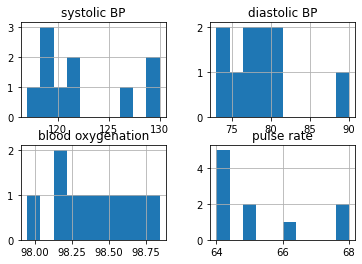

In [11]:
our_df.hist();

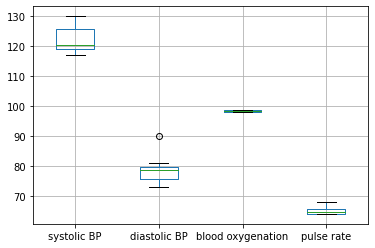

In [12]:
our_df.boxplot();

For a complete listing of what our data frame knows how to do, we can type `our_df.` and then hit the tab key.

Let's return to the `mean()` function, and see what, exactly, it is returning. We can do this by assigning the output to a variable and looking at its type.

In [23]:
our_means = our_df.mean()
our_means

systolic BP          122.30
diastolic BP          78.60
blood oxygenation     98.41
pulse rate            65.20
dtype: float64

In [24]:
type(our_means)

pandas.core.series.Series

So it is a pandas series, but, rather than the index being 0, 1, 2, 3, the *index values are actually the names of our variables*. 

If we want the mean pulse rate, *we can actually ask for it by name!*

In [14]:
our_means['pulse rate']

65.2

This introduces another key feature of pandas: **you can access data by name**.

## Accessing data

Accessing data by name is kind of a big deal. It makes code more readable and faster and easier to write.

So, for example, let's say we wanted the mean pulse rate for our patients. Using numpy, we would have to remember or figure our which column of our numpy array was pulse rate. And we'd have to remember that Python indexes start at 0. *And* we'd have to remember that we have to tell numpy to take the mean down the columns explicitly. Ha. 

So our code might look something like...

In [15]:
np_style_means = our_array.mean(axis=0)
pulse_mean = np_style_means[3]
pulse_mean

65.2

Compare that to doing it the pandas way:

In [16]:
our_means = our_df.mean()
our_means['pulse rate']

65.2

The pandas way makes it very clear what we are doing!

### Accessing data using square brackets

Let's look ot our litte data frame again.

In [17]:
our_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate
0,119,78,98.55,68
1,119,81,98.84,64
2,127,75,98.45,64
3,121,80,98.15,66
4,120,79,98.71,68
5,117,77,97.95,64
6,119,74,98.64,64
7,129,90,98.38,64
8,122,73,98.17,65
9,130,79,98.26,65


We can grab a column (variable) by name if we want:

In [19]:
our_df['pulse rate']

0    68
1    64
2    64
3    66
4    68
5    64
6    64
7    64
8    65
9    65
Name: pulse rate, dtype: int64

Doing this creates another `DataFrame` (or `Series`), so it knows how to do stuff to. This allows us to do things like, for example, compute the mean pulse rate in one step instead of two. Like this:

In [20]:
our_df['pulse rate'].mean()   # creates a series, then makes it compute its own mean

65.2

We can grab as many columns as we want by using a list of column names.

In [21]:
needed_cols = ['diastolic BP', 'systolic BP']   # make a list
our_df[needed_cols]                             # use the list to grab columns

,diastolic BP,systolic BP
0,78,119
1,81,119
2,75,127
3,80,121
4,79,120
5,77,117
6,74,119
7,90,129
8,73,122
9,79,130


We could also do this in one step.

In [22]:
our_df[['diastolic BP', 'systolic BP']]  # the inner brackets define our list

,diastolic BP,systolic BP
0,78,119
1,81,119
2,75,127
3,80,121
4,79,120
5,77,117
6,74,119
7,90,129
8,73,122
9,79,130


 (although the double brackets might look a little confusing at first)

### Getting row and row/column combinations of data: "indexing"

**Terminology Warning!** "Indexing" is a general term which means "accessing data by location". In pandas, as we have seen, objects like DataFrames also have an "index" which is a special column of row identifiers. So, in pandas, we can index data using
* column names  (e.g. `our_df['pulse rate']`)
* row names (indexes – we can use the index to index!) (e.g. `our_means['pulse rate']`)

#### Changing the index to make (row) indexing more intuitive

Speaking of indexes, it's a little weird to have our patient IDs start at "0". Both because "patient zero" has a special meaning and also because it's just not intuitive to number a sequence of actual things starting at "0".

Fortunately, pandas `DataFrame` (and `Series`) objects allow you to customize their index column fairly easily.

Let's set the index to start at 1 rather than 0:

In [25]:
my_ind = np.linspace(1, 10, 10)  # make a sequence from 1 to 10
my_ind = np.int64(my_ind)        # change it from decimal to integer (not really necessary, but...)
our_df.index = my_ind

In [26]:
our_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate
1,119,78,98.55,68
2,119,81,98.84,64
3,127,75,98.45,64
4,121,80,98.15,66
5,120,79,98.71,68
6,117,77,97.95,64
7,119,74,98.64,64
8,129,90,98.38,64
9,122,73,98.17,65
10,130,79,98.26,65


### Accessing data using `pd.DataFrame.loc[]`

In the section above, we saw that you can get columns of data our of a data frame using square brackets `[]`. Pandas data frames also know how to give you subsets of rows or row/column combinations.  

The primary method for accessing specific bits of data from a pandas data frame is with the `loc[]` verb. It provides an easy way to get rows of data based upon the index column. In other words, `loc[]` is the way we use the data frame index as an index!

So this will give us the data for patient number 3:

In [31]:
our_df.loc[3]

systolic BP          127.00
diastolic BP          75.00
blood oxygenation     98.45
pulse rate            64.00
Name: 3, dtype: float64

**Note!** The above call did **not** behave like a Python or numpy index! If it had, we would have gotten the data for patient number 4 because Python and numpy use *zero based indexing*. But using the `loc[]` function, we literally get what we asked for! Yay!

We can also *slice* out rows in chunks:

In [32]:
our_df.loc[3:6]

,systolic BP,diastolic BP,blood oxygenation,pulse rate
3,127,75,98.45,64
4,121,80,98.15,66
5,120,79,98.71,68
6,117,77,97.95,64


Which, again, gives us what we asked for without having to worry about the zero-based business.

But `.loc[]` also allows us to get specfic columns too. Like:

In [34]:
our_df.loc[3:6, 'blood oxygenation']

3    98.45
4    98.15
5    98.71
6    97.95
Name: blood oxygenation, dtype: float64

For a single column, or:

In [ ]:
our_df.loc[3:6,'systolic BP':'blood oxygenation']

,systolic BP,diastolic BP,blood oxygenation
3,127,75,98.45
4,121,80,98.15
5,120,79,98.71
6,117,77,97.95


for multiple columns.

In summary, there are 3 main ways to get chunks of data out of a data frame "by name".

* square brackets (only) gives us columns, e.g. `our_df['systolic BP']`
* `loc[]` with one argument gives us rows, e.g. `our_df.loc[3]`
* `loc[]` with two arguments gives us row-column combinations, e.g. `our_df.loc[3,'systolic BP']`

Additionally, with `loc[]`, we can specify index ranges for the rows or columns or both, e.g. `new_df.loc[3:6,'systolic BP':'blood oxygenation']`

One final thing about using `loc[]` is that the index column in a `DataFrame` doesn't have to be numbers. It can be date/time strings (as we'll see next time), or just plain strings (as we've seen above with `Series` objects).

Let's look at a summary of our data using the `describe()` method:

In [35]:
our_sum = our_df.describe()
our_sum

,systolic BP,diastolic BP,blood oxygenation,pulse rate
count,10.000000,10.000000,10.000000,10.000000
mean,122.300000,78.600000,98.410000,65.200000
std,4.643993,4.788876,0.280713,1.619328
min,117.000000,73.000000,97.950000,64.000000
25%,119.000000,75.500000,98.192500,64.000000
50%,120.500000,78.500000,98.415000,64.500000
75%,125.750000,79.750000,98.617500,65.750000
max,130.000000,90.000000,98.840000,68.000000


This looks suspiciously like a data frame except the index column looks like they're... er... not indexes. Let's see.

In [36]:
type(our_sum)

pandas.core.frame.DataFrame

Yep, it's a data frame! But let's see if that index column actually works:

In [37]:
our_sum.loc['mean']

systolic BP          122.30
diastolic BP          78.60
blood oxygenation     98.41
pulse rate            65.20
Name: mean, dtype: float64

(Unlike with a `Series` object, just using square brackets won't work with a `DataFrame`)

In [39]:
our_sum['mean']

KeyError: 'mean'

And now we can slice out rows:

In [40]:
our_sum.loc['count':'std']

,systolic BP,diastolic BP,blood oxygenation,pulse rate
count,10.000000,10.000000,10.000000,10.000000
mean,122.300000,78.600000,98.410000,65.200000
std,4.643993,4.788876,0.280713,1.619328


Or rows and columns:

In [41]:
our_sum.loc['count':'std', 'systolic BP':'diastolic BP']

,systolic BP,diastolic BP
count,10.000000,10.000000
mean,122.300000,78.600000
std,4.643993,4.788876


### Accessing data using pd.DataFrame.iloc[]

Occasionally (very occasionally), you might want to treat a pandas `DataFrame` as a numpy `Array` and index into it using the *implicit* row and column indexes (which start as zero of course). So support this, pandas `DataFrame` objects also have an `iloc[]`.

Let's look at our data frame again:

In [43]:
our_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate
1,119,78,98.55,68
2,119,81,98.84,64
3,127,75,98.45,64
4,121,80,98.15,66
5,120,79,98.71,68
6,117,77,97.95,64
7,119,74,98.64,64
8,129,90,98.38,64
9,122,73,98.17,65
10,130,79,98.26,65


Now let's index into it using `iloc[]`:

In [42]:
our_df.iloc[3]  # get the fourth row

systolic BP          121.00
diastolic BP          80.00
blood oxygenation     98.15
pulse rate            66.00
Name: 4, dtype: float64

And compare that to using `loc[]`:

In [44]:
our_df.loc[3]

systolic BP          127.00
diastolic BP          75.00
blood oxygenation     98.45
pulse rate            64.00
Name: 3, dtype: float64

And of course you can slice out rows and columns:

In [ ]:
our_df.iloc[2, 0:1]

Indexing using `iloc[]` is rarely needed (if you're using it, you should probably be working with a numpy `Array`), but it's there just in case.

## Non-numerical information (categories or factors)

One of the huge benefits of pandas objects is that, unlike numpy arrays, they can contain categorical variables.

Let's use tools we've learned to make a data frame that has both numerical and categorical variables.

First, we'll make the numerical data:

In [45]:
num_patients = 20    # specify the number of patients

# make some simulated data with realistic numbers.
sys_bp = np.int64(125 + 5*np.random.randn(num_patients,))
dia_bp = np.int64(80 + 5*np.random.randn(num_patients,))
b_oxy = np.round(98.5 + 0.3*np.random.randn(num_patients,), 2)
pulse = np.int64(65 + 2*np.random.randn(num_patients,))


(Now we'll make them interesting – this will be clear later)

In [54]:
sys_bp[0:10] = sys_bp[0:10] + 15
dia_bp[0:10] = dia_bp[0:10] + 15
sys_bp[0:5] = sys_bp[0:5] + 5
dia_bp[0:5] = dia_bp[0:5] + 5
sys_bp[10:15] = sys_bp[10:15] + 5
dia_bp[10:15] = dia_bp[10:15] + 5

Now let's make a categorical variable indicating whether the patient is diabetic or not. We'll make the first half be diabetic.

In [55]:
diabetic = pd.Series(['yes', 'no'])  # make the short series
diabetic = diabetic.repeat(num_patients/2)       # repeat each over two cell's worth of data
diabetic = diabetic.reset_index(drop=True)      # reset the series's index value

Now will make an "inner" gender variable.

In [56]:
gender = pd.Series(['male', 'female'])             # make the short series
gender = gender.repeat(num_patients/4)                 # repeat each over one cell's worth of data
gender = pd.concat([gender]*2, ignore_index=True)   # stack or "concatenate" two copies

Now we'll make a dictionary containing all our data.

In [57]:
# Make a dictionary with a "key" for each variable name, and 
# the "values" being the num_patients long data vectors
df_dict = {'systolic BP' : sys_bp,
           'diastolic BP' : dia_bp,
           'blood oxygenation' : b_oxy,
           'pulse rate' : pulse,
           'gender': gender,
           'diabetes': diabetic
           }
    

And turn it into a data frame.

In [58]:
new_df = pd.DataFrame(df_dict)    # Now make a data frame out of the dictionary

Finally, let's up our game and make a more descriptive index column!

In [59]:
colname = 'patient '                      # make a "base" row name
my_index = []                             # make an empty list
for i in range(1, num_patients+1) :       # use a for loop to add
    my_index.append(colname + str(i))     # id numbers so the base name

Assign our new row names to the index of our data frame.

In [60]:
new_df.index = my_index

Let's look at our creation!

In [61]:
new_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate,gender,diabetes
patient 1,147,102,98.30,65,male,yes
patient 2,150,93,98.19,66,male,yes
patient 3,148,104,98.98,63,male,yes
patient 4,144,93,98.62,60,male,yes
patient 5,145,99,98.49,61,male,yes
patient 6,141,91,98.87,62,female,yes
patient 7,136,94,98.69,66,female,yes
patient 8,140,95,98.24,63,female,yes
patient 9,139,96,97.82,67,female,yes
patient 10,135,84,98.55,64,female,yes


### Looking at our data

Another really nice thing about pandas `DataFrames` is that they naturally lend themselves to interogation via Seaborn. So let's peek at some stuff.

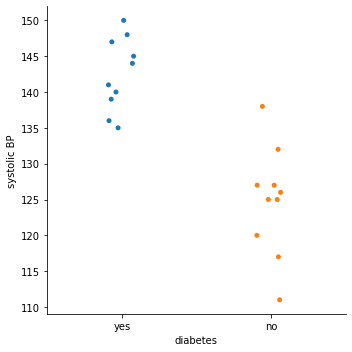

In [65]:
import seaborn as sns

sns.catplot(data=new_df, x='diabetes', y='systolic BP');

Okay, now let's go crazy and do a bunch of plots.

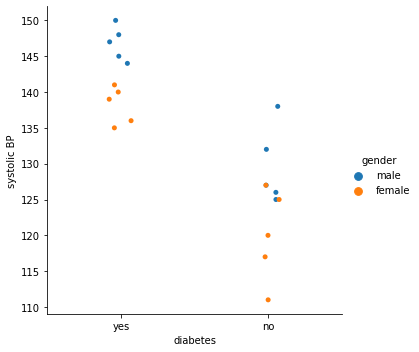

In [66]:
sns.catplot(data=new_df, x='diabetes', y='systolic BP', hue='gender');

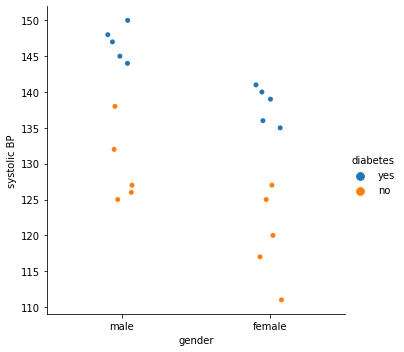

In [67]:
sns.catplot(data=new_df, x='gender', y='systolic BP', hue='diabetes');

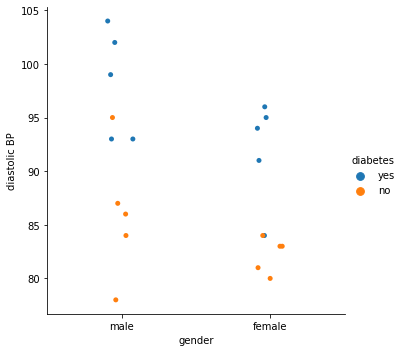

In [68]:
sns.catplot(data=new_df, x='gender', y='diastolic BP', hue='diabetes');

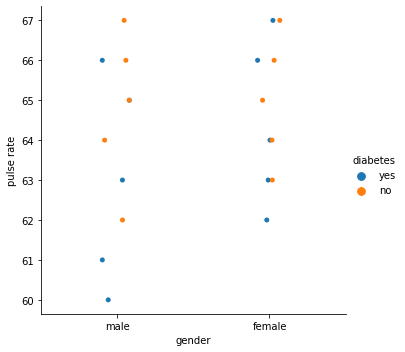

In [69]:
sns.catplot(data=new_df, x='gender', y='pulse rate', hue='diabetes');

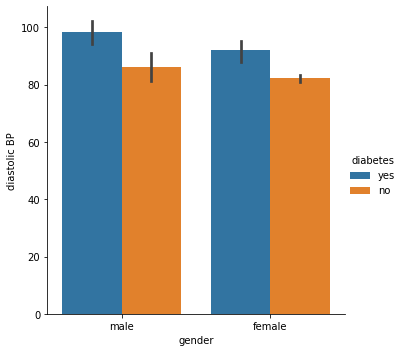

In [71]:
sns.catplot(data=new_df, x='gender', y='diastolic BP', hue='diabetes', kind='bar');

### Computing within groups

Now that we have an idea of what's going on, let's look at how we could go about computing things like the mean systolic blood pressure in females vs. males, etc.

In [72]:
new_df.groupby('gender')

So this gave us a `DataFrameGroupBy` object which, in and of itself, is very useful. However, it knows how to do things!

So, if we want the mean by gender, we can ask the `GroupBy` (for short) object to give us the mean:

In [76]:
new_df.groupby('gender').mean()

,systolic BP,diastolic BP,blood oxygenation,pulse rate
gender,,,,
female,129.1,87.1,98.428,64.7
male,138.2,92.1,98.397,63.9


More powerfully, we can use a `GroupBy` objects aggregate method to compute many things at once.

In [85]:
new_df.min()

systolic BP             111
diastolic BP             78
blood oxygenation     97.72
pulse rate               60
gender               female
diabetes                 no
dtype: object

In [92]:
new_df[['systolic BP', 'diastolic BP', 'diabetes']].groupby('diabetes').aggregate(['mean', 'std', min, max])

systolic BP                     diastolic BP                   
                mean       std  min  max         mean       std min  max
diabetes                                                                
no             124.8  7.539525  111  138         84.1  4.677369  78   95
yes            142.5  5.104464  135  150         95.1  5.704774  84  104

In [93]:
new_df.groupby('diabetes')[['systolic BP']].mean()

,systolic BP
diabetes,
no,124.8
yes,142.5


In [94]:
new_df.pivot_table('systolic BP', index='diabetes', columns='gender')

gender,female,male
diabetes,,
no,120.0,129.6
yes,138.2,146.8
